In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('training_set.csv')
test = pd.read_csv('testing_set.csv')
validation = pd.read_csv('sample_submission.csv')

In [3]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
validation.head()

,Unnamed: 0,Loan_ID,Loan_Status
0,0,LP001015,Y
1,1,LP001022,Y
2,2,LP001031,Y
3,3,LP001035,Y
4,4,LP001051,Y


In [6]:
#PRE_PROCESSING DATA

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [8]:
train.isnull().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Belum kebawah

In [10]:
train['TotalIncome_log']= np.log(train['ApplicantIncome']+train['CoapplicantIncome'])
train['LoanAmount_log']= np.log(train['LoanAmount'])
train['Loan_Amount_Term_log'] = np.log(train['Loan_Amount_Term'])

In [11]:
# Missing Values

train['Gender'].fillna(train['Gender'].mode(), inplace = True)
train['Married'].fillna(train['Married'].mode(), inplace = True)
train['Dependents'].fillna(train['Dependents'].mode(), inplace = True)
train['Education'].fillna(train['Education'].mode(), inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode(), inplace = True)

train['LoanAmount_log'].fillna(train['LoanAmount_log'].mean(),inplace=True)
train['Loan_Amount_Term_log'].fillna(train['Loan_Amount_Term_log'].mean(),inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode(), inplace=True)
train['TotalIncome_log'].fillna(train['TotalIncome_log'].mean(),inplace=True)

train.isnull().sum()

Loan_ID                  0
Gender                  15
Married                  3
Dependents              15
Education                1
Self_Employed           32
ApplicantIncome          2
CoapplicantIncome        1
LoanAmount              22
Loan_Amount_Term        14
Credit_History          50
property_Area            0
Loan_Status              0
TotalIncome_log          0
LoanAmount_log           0
Loan_Amount_Term_log     0
dtype: int64

In [12]:
train.drop(columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,property_Area,Loan_Status,TotalIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.857444,5.886104
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N,8.670086,4.852030,5.886104
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,8.505323,4.787492,5.886104
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,1.0,Rural,Y,7.972466,4.262680,5.886104
610,LP002979,Male,Yes,3+,Graduate,No,1.0,Rural,Y,8.320205,3.688879,5.192957
611,LP002983,Male,Yes,1,Graduate,No,1.0,Urban,Y,9.025456,5.533389,5.886104
612,LP002984,Male,Yes,2,Graduate,No,1.0,Urban,Y,8.933664,5.231109,5.886104


In [13]:
train.isnull().sum()

Loan_ID                  0
Gender                  15
Married                  3
Dependents              15
Education                1
Self_Employed           32
ApplicantIncome          2
CoapplicantIncome        1
LoanAmount              22
Loan_Amount_Term        14
Credit_History          50
property_Area            0
Loan_Status              0
TotalIncome_log          0
LoanAmount_log           0
Loan_Amount_Term_log     0
dtype: int64

In [14]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome_log,LoanAmount_log,Loan_Amount_Term_log
count,612.000000,613.000000,592.000000,600.00000,564.000000,614.000000,614.000000,614.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199,8.670086,4.857444,5.801300
std,6118.914057,2928.624748,85.587325,65.12041,0.364878,0.544929,0.495995,0.312442
min,150.000000,0.000000,9.000000,12.00000,0.000000,7.273786,2.197225,2.484907
25%,2875.750000,0.000000,100.000000,360.00000,1.000000,8.334712,4.607658,5.886104
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000,8.598312,4.857444,5.886104
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000,8.925549,5.104426,5.886104
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,11.302204,6.551080,6.173786


In [15]:
X = train.drop(columns=['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term', 'Loan_Status']).values
Y = train['Loan_Status'].values

<AxesSubplot:xlabel='Gender', ylabel='count'>

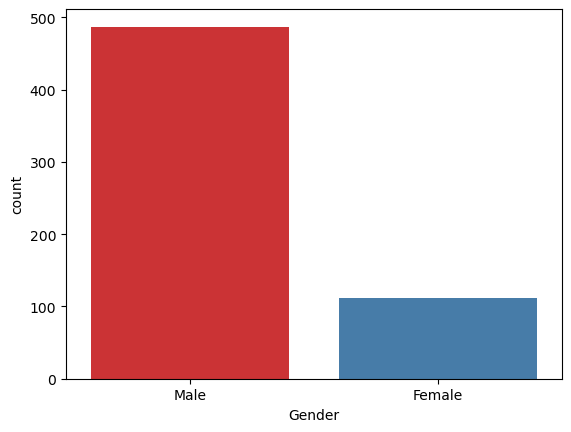

In [16]:
import seaborn as sns
#Descriptive Analysis

train['Gender'].value_counts()
sns.countplot(x='Gender',data=train, palette='Set1')

<AxesSubplot:xlabel='Education', ylabel='count'>

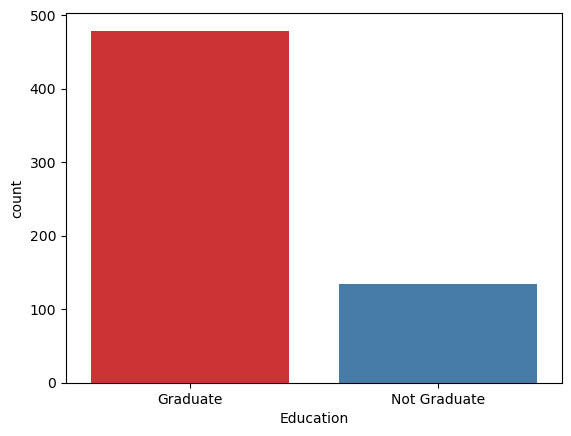

In [17]:
sns.countplot(x='Education',data=train, palette='Set1')


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
for i in range(0, 6):
    X_train[:,i] = LabelEncoder().fit_transform(X_train[:,i])

X_train

array([[1, 1, 0, ..., 9.017968479328726, 5.579729825986222,
        5.886104031450156],
       [1, 1, 0, ..., 8.675563527387679, 4.875197323201151,
        5.886104031450156],
       [1, 1, 2, ..., 8.980298078970817, 5.3471075307174685,
        5.886104031450156],
       ...,
       [0, 0, 0, ..., 8.082402253926244, 3.4011973816621555,
        5.886104031450156],
       [0, 2, 4, ..., 9.215029361462314, 4.857444178729353,
        5.480638923341991],
       [1, 1, 4, ..., 9.521494800613105, 4.857444178729353,
        5.886104031450156]], dtype=object)

In [21]:
for i in range(0, 6):
    X_test[:,i] = LabelEncoder().fit_transform(X_test[:,i])

X_test

array([[1, 1, 0, ..., 9.114159813502214, 5.429345628954441,
        5.886104031450156],
       [1, 1, 0, ..., 8.368693183097793, 4.867534450455582,
        5.886104031450156],
       [1, 1, 2, ..., 8.633018756921828, 5.062595033026967,
        5.886104031450156],
       ...,
       [1, 1, 1, ..., 8.460622839927844, 4.812184355372417,
        6.173786103901937],
       [2, 1, 2, ..., 8.670086068066265, 4.6913478822291435,
        5.886104031450156],
       [1, 1, 0, ..., 11.05622495553552, 6.194405391104672,
        5.19295685089021]], dtype=object)

In [22]:
y_train = LabelEncoder().fit_transform(y_train)
y_train

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,

In [23]:
y_test = LabelEncoder().fit_transform(y_test)
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [24]:
X_train

array([[1, 1, 0, ..., 9.017968479328726, 5.579729825986222,
        5.886104031450156],
       [1, 1, 0, ..., 8.675563527387679, 4.875197323201151,
        5.886104031450156],
       [1, 1, 2, ..., 8.980298078970817, 5.3471075307174685,
        5.886104031450156],
       ...,
       [0, 0, 0, ..., 8.082402253926244, 3.4011973816621555,
        5.886104031450156],
       [0, 2, 4, ..., 9.215029361462314, 4.857444178729353,
        5.480638923341991],
       [1, 1, 4, ..., 9.521494800613105, 4.857444178729353,
        5.886104031450156]], dtype=object)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

ValueError: could not convert string to float: 'Semiurban'

array([9.114159813502214, 8.368693183097793, 8.633018756921828,
       7.9724660159745655, 7.907651594711089, 8.297543529356284,
       8.220672170297252, 8.006367567650246, 8.350902451694811,
       8.299534570332597, 8.517193191416238, 8.556990661290303,
       7.946263643580541, 8.55468163582723, 8.827028068509152,
       8.707152175339404, 7.8156105320351905, 9.065198986306513,
       8.503905297089302, 8.433811582477187, 8.11312710422178,
       9.067277989134345, 8.467582690862903, 8.835646922534773,
       9.492658081928813, 9.399554785027307, 8.387995252944556,
       8.136810863675537, 8.246171559857563, 8.32020459757888,
       8.268731832117737, 8.827028068509152, 8.439231649946526,
       8.694167141883597, 9.364433907313582, 8.715388097366482,
       8.744647438317532, 8.648747631156539, 8.262300941787448,
       8.089175678837561, 8.578476419833136, 8.46863300080086,
       9.210340371976184, 8.476579508530941, 8.279697133877628,
       8.27308133366583, 8.927314111060596